# Preprocessing steps analysis for Hoag datasets

### Import modules and define methods

In [1]:
%reload_ext autoreload
%autoreload 2

from preprocess import *
from argparse import Namespace

import matplotlib.pyplot as plt
plt.set_cmap('gray')
plt.rcParams['figure.figsize'] = (15, 12)
metadata={
    'lambda': []
}

def show_img(img, title='', axis=False, vmin=None, vmax=None):
    imshow_args = {}
    
    if vmin:
        imshow_args['vmin'] = vmin
    if vmax:
        imshow_args['vmax'] = vmax
    
    im_axis = 'on' if axis else 'off'
    plt.axis(im_axis)
    plt.imshow(img, **imshow_args)
    plt.title(title, fontsize=15)

def show_gad_comparison(img_pre, img_low, img_post, vmin=None, vmax=None):
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()

    fig.add_subplot(1, 3, 1)
    show_img(img_pre, title='Pre contrast', vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 3, 2)
    show_img(img_low, title='10% dosage', vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 3, 3)
    show_img(img_post, title='Full dosage', vmin=vmin, vmax=vmax)

    plt.show()

def show_comparison(img1, img2, titles=['', ''], vmin=None, vmax=None):
    fig = plt.figure(figsize=(15, 10))
    fig.tight_layout()

    fig.add_subplot(1, 2, 1)
    show_img(img1, title=titles[0], vmin=vmin, vmax=vmax)

    fig.add_subplot(1, 2, 2)
    show_img(img2, title=titles[1], vmin=vmin, vmax=vmax)
    
    plt.show()

def iminfo(img):
    print(img.shape, img.dtype, img.min(), img.max(), img.mean())

def diff_img(img1, img2):
    return np.abs(np.subtract(img1.astype(np.float32), img2.astype(np.float32))).astype(np.float32)

IDX=112

/home/srivathsa/projects/SubtleGad/train/subtle/utils/hyperparameter.py:8: UserWarning: Module test_tube not found - hyperparameter related functions cannot be used
  warnings.warn('Module test_tube not found - hyperparameter related functions cannot be used')
/home/srivathsa/miniconda3/envs/py35gad/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


<Figure size 432x288 with 0 Axes>

### Initialize dummy argparse Namespace

In [14]:
args = Namespace(
    path_base='/home/srivathsa/projects/studies/gad/gen_siemens/data/101_Id_033', verbose=True,
    output='/home/srivathsa/projects/studies/gad/gen_siemens/preprocess/data/101_Id_033',
    discard_start_percent=0, discard_end_percent=0, normalize=True,
    normalize_fun='mean', transform_type='affine', scale_matching=True,
    path_zero=None, path_low=None, path_full=None, mask_threshold=0.1,
    fsl_mask=True, fsl_mask_all_ims=True, use_fsl_reg=False,
    override=False, skip_mask=False, scale_dicom_tags=False, skip_hist_norm=True,
    skip_registration=False, nslices=20, joint_normalize=True, global_scale_ref_im0=False, noise_mask_area=False,
    register_with_dcm_reference=False, non_rigid_reg=False
)

### Fetch original images

In [3]:
ims, hdr, metadata = get_images(args, metadata)
orig_ims = np.copy(ims)

path_zero = /home/srivathsa/projects/studies/gad/gen_siemens/data/101_Id_033/Mri_Brain_W_Wo_Contrast_-_0/SAG_MPRAGE_2
path_low = /home/srivathsa/projects/studies/gad/gen_siemens/data/101_Id_033/Mri_Brain_W_Wo_Contrast_-_0/SAG_MPRAGE_WE_10_PERCENT_10
path_full = /home/srivathsa/projects/studies/gad/gen_siemens/data/101_Id_033/Mri_Brain_W_Wo_Contrast_-_0/SAG_MPRAGE_WE_POST_11
image sizes:  (192, 320, 320) (192, 320, 320) (192, 320, 320)


(320, 320) float32 0.0 1064.0 200.16756
(320, 320) float32 0.0 623.0 164.56056
(320, 320) float32 0.0 1193.0 203.6539


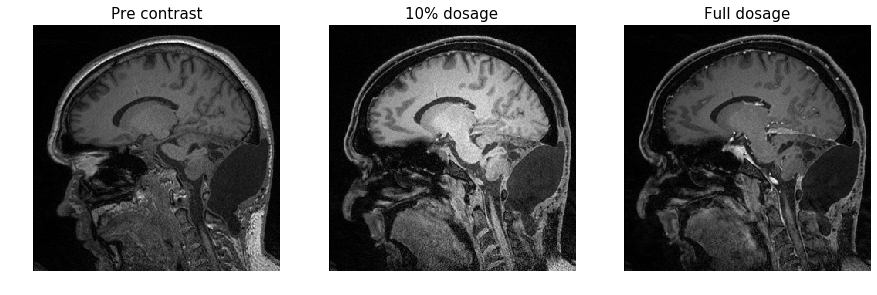

In [4]:
iminfo(ims[IDX, 0])
iminfo(ims[IDX, 1])
iminfo(ims[IDX, 2])

show_gad_comparison(ims[IDX, 0], ims[IDX, 1], ims[IDX, 2])

### Mask images

In [5]:
ims, mask, metadata = mask_images(args, ims, metadata)

masking


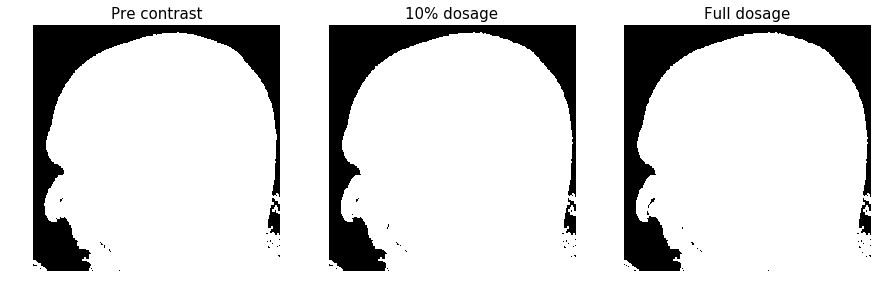

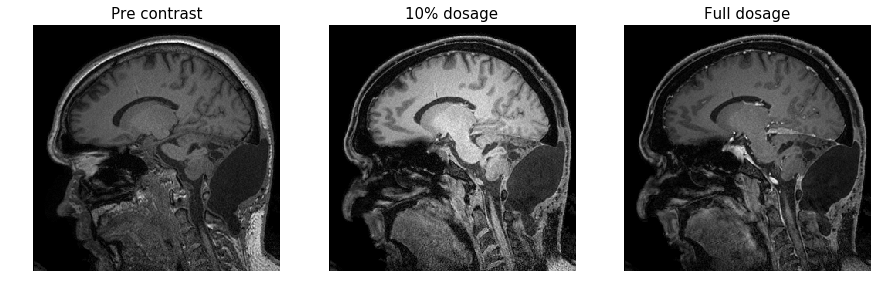

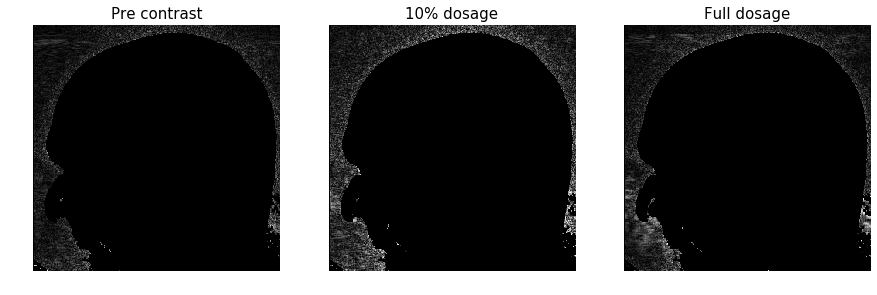

In [6]:
show_gad_comparison(mask[IDX, 0], mask[IDX, 1], mask[IDX, 2])
show_gad_comparison(ims[IDX, 0], ims[IDX, 1], ims[IDX, 2])

pre_diff = diff_img(orig_ims[IDX, 0], ims[IDX, 0])
low_diff = diff_img(orig_ims[IDX, 1], ims[IDX, 1])
post_diff = diff_img(orig_ims[IDX, 2], ims[IDX, 2])

show_gad_comparison(pre_diff, low_diff, post_diff)

### Scale DICOM slope and intercept

In [7]:
ims, metadata = dicom_scaling(args, ims, hdr, metadata)

(320, 320) float32 0.0 1064.0 197.60365
(320, 320) float32 0.0 623.0 162.10864
(320, 320) float32 0.0 1193.0 200.18045


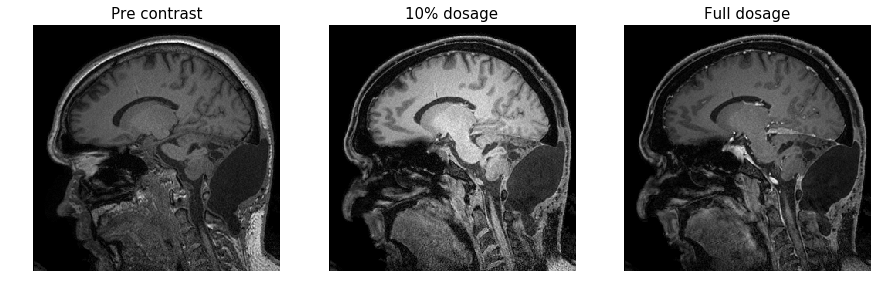

In [8]:
iminfo(ims[IDX, 0])
iminfo(ims[IDX, 1])
iminfo(ims[IDX, 2])

show_gad_comparison(ims[IDX, 0], ims[IDX, 1], ims[IDX, 2])

### Histogram normalization

In [9]:
orig_ims = np.copy(ims)
ims, metadata = hist_norm(args, ims, metadata)

Skipping histogram normalization


(320, 320) float32 0.0 1064.0 197.60365
(320, 320) float32 0.0 623.0 162.10864
(320, 320) float32 0.0 1193.0 200.18045


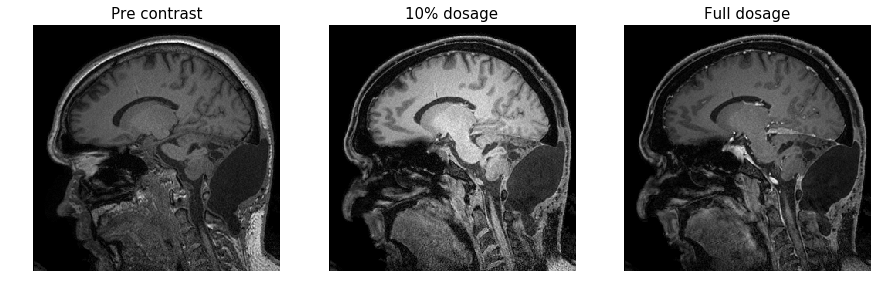

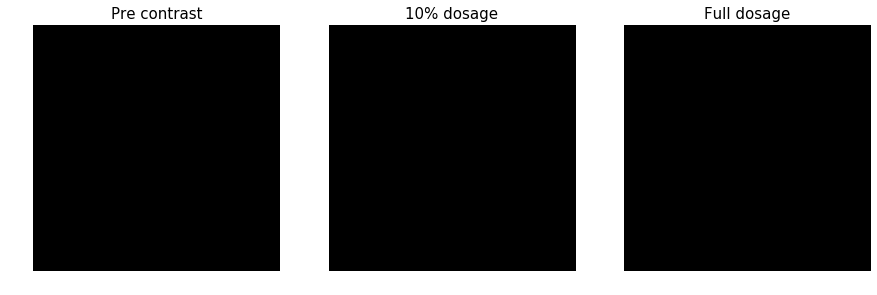

In [10]:
iminfo(ims[IDX, 0])
iminfo(ims[IDX, 1])
iminfo(ims[IDX, 2])

show_gad_comparison(ims[IDX, 0], ims[IDX, 1], ims[IDX, 2])

pre_diff = diff_img(orig_ims[IDX, 0], ims[IDX, 0])
low_diff = diff_img(orig_ims[IDX, 1], ims[IDX, 1])
post_diff = diff_img(orig_ims[IDX, 2], ims[IDX, 2])

show_gad_comparison(pre_diff, low_diff, post_diff)

### Image registration

In [15]:
ims, metadata = register(args, ims, metadata)

image registration
registration done, 4.51 s
low dose transform parameters: ('1.00064', '-0.0208599', '0.0338714', '0.019994', '1.00173', '-0.0407265', '-0.0374382', '0.0400853', '1.00267', '1.31181', '0.29886', '3.21453')
image registration
registration done, 4.65 s
Planning to re-run registration on full brain images...
full dose transform parameters: ('1.0031', '-0.0309446', '0.0339789', '0.0288013', '1.00286', '-0.0402071', '-0.0394572', '0.0399301', '1.00303', '1.52521', '-0.833273', '3.44245')


(320, 320) float32 0.0 602.39905 160.71632
(320, 320) float32 0.0 1187.8964 199.38084


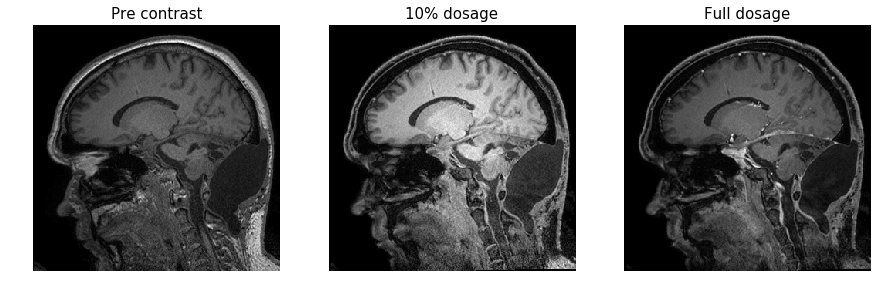

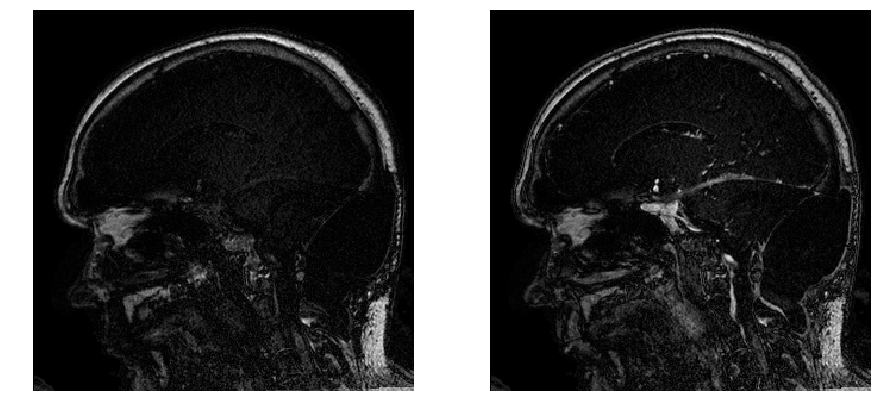

In [16]:
iminfo(ims[IDX, 1])
iminfo(ims[IDX, 2])

show_gad_comparison(ims[IDX, 0], ims[IDX, 1], ims[IDX, 2])
show_comparison(diff_img(ims[IDX, 0], ims[IDX, 1]), diff_img(ims[IDX, 0], ims[IDX, 2]))

### Zoom

In [ ]:
args.zoom = 512
args.zoom_order = 3

ims_zoom, metadata = zoom_process(args, ims, metadata)

In [ ]:
iminfo(ims_zoom)
show_gad_comparison(ims_zoom[IDX, 0], ims_zoom[IDX, 1], ims_zoom[IDX, 2])

### Match scales and global normalization

In [ ]:
orig_ims = np.copy(ims)

ims, ims_mod, metadata = prescale_process(args, ims, mask, metadata)
ims, ims_mod, metadata = match_scales(args, ims, ims_mod, metadata)
ims, metadata = global_norm(args, ims, ims_mod, metadata)

In [ ]:
iminfo(ims[IDX, 0])
iminfo(ims[IDX, 1])
iminfo(ims[IDX, 2])

show_gad_comparison(ims[IDX, 0], ims[IDX, 1], ims[IDX, 2])

## Hoag

### Before hist-eq

| Min | Max | Mean |
| ----|-----|------|
| 0.0 | 1590.0 | 203.27867 |
| 0.0 | 1718.0 | 163.46953 |
| 0.0 | 1831.0 | 209.00232 |

### After hist-eq
| Min | Max | Mean |
| ----|-----|------|
| 0.0 | 1590.0 | 198.17671 |
| 0.0 | 1718.0 | 158.98676 |
| 0.0 | 1831.0 | 204.06445 |


## Tiantan

### Before hist-eq

| Min | Max | Mean |
| ----|-----|------|
| 0.0 | 570.0 | 110.65271 |
| 0.0 | 769.0 | 134.63882 |
| 0.0 | 1362.0 | 175.23274 |

### After hist-eq

| Min | Max | Mean |
| ----|-----|------|
| 0.0 | 570.0 | 109.19512 |
| 0.0 | 652.9431 | 118.8643 |
| 0.0 | 659.8182 | 120.746 |